In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 파일 재로드 시도: 인코딩 변경
congestion_data = pd.read_csv('./서울교통공사_지하철혼잡도정보_20240930.csv', encoding='cp949')
passenger_data = pd.read_csv('./서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='cp949')

# 데이터 구조 확인
congestion_head = congestion_data.head()
passenger_head = passenger_data.head()

print(congestion_head)
print(passenger_head)

  요일구분  호선  역번호  출발역 상하구분  5시30분  6시00분  6시30분  7시00분  7시30분  ...  20시00분  \
0   평일   1  158  청량리   상선    9.7    8.7    5.0    8.7   10.3  ...    26.1   
1   평일   1  158  청량리   하선   21.7   19.2   29.2   45.6   70.2  ...    11.3   
2   평일   1  157  제기동   상선   10.0   10.7    7.5    9.1   12.5  ...    30.5   
3   평일   1  157  제기동   하선   21.7   20.4   30.2   45.6   63.2  ...    13.3   
4   평일   1  156  신설동   상선    9.0   13.3    8.2   10.1   14.5  ...    30.9   

   20시30분  21시00분  21시30분  22시00분  22시30분  23시00분  23시30분  00시00분  00시30분  
0    25.7    27.8    23.8    22.4    23.7    22.9    15.1     8.7     0.0  
1     9.8    11.4    10.3     8.2     9.4     8.2     8.5     2.4     0.2  
2    25.5    34.3    27.0    25.0    26.9    25.6    17.2    11.9     0.0  
3    11.0    11.7    10.5     9.1    10.0     8.5     8.6     2.3     0.3  
4    26.2    35.4    27.9    26.0    28.1    25.4    16.6    13.1     0.0  

[5 rows x 44 columns]
       사용일자    호선명        역명  승차총승객수  하차총승객수      등록일자
0  

In [16]:
# 각 컬럼별 결측치 개수 확인
print("혼잡도 데이터 결측치 개수:")
print(congestion_data.isnull().sum())

print("\n승하차 데이터 결측치 개수:")
print(passenger_data.isnull().sum())

혼잡도 데이터 결측치 개수:
요일구분         0
호선           0
역번호          0
출발역          0
상하구분         0
5시30분       26
6시00분        0
6시30분        0
7시00분        0
7시30분        0
8시00분        0
8시30분        0
9시00분        0
9시30분        0
10시00분       0
10시30분       0
11시00분       0
11시30분       0
12시00분       0
12시30분       0
13시00분       0
13시30분       0
14시00분       0
14시30분       0
15시00분       0
15시30분       0
16시00분       0
16시30분       0
17시00분       0
17시30분       0
18시00분       0
18시30분       0
19시00분       0
19시30분       0
20시00분       0
20시30분       0
21시00분       0
21시30분       0
22시00분       0
22시30분       0
23시00분       0
23시30분      10
00시00분     386
00시30분    1117
dtype: int64

승하차 데이터 결측치 개수:
사용일자      0
호선명       0
역명        0
승차총승객수    0
하차총승객수    0
등록일자      0
dtype: int64


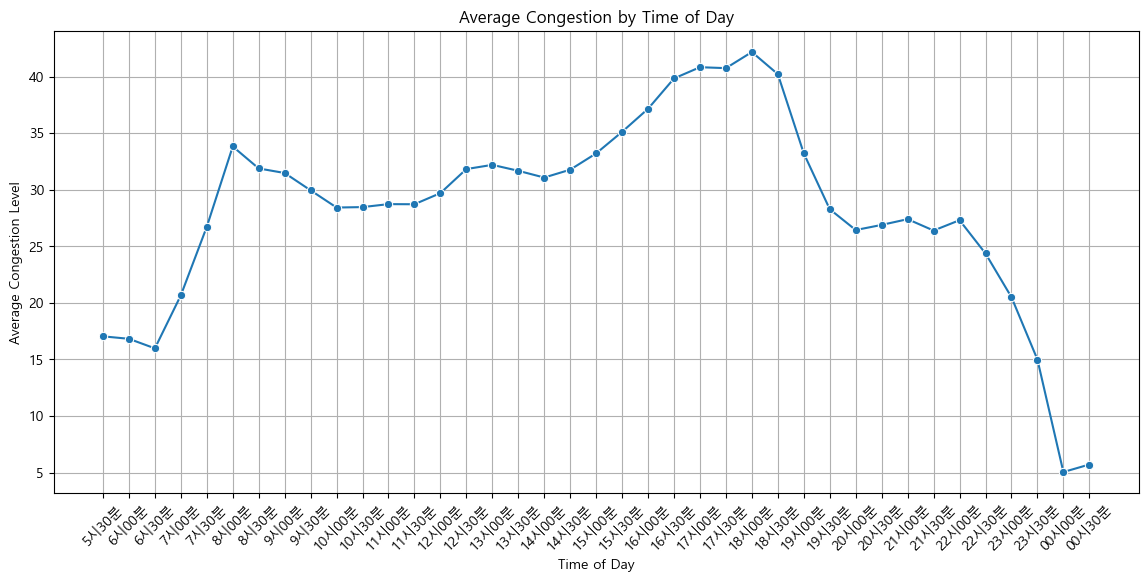

In [21]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시간대 컬럼 추출(모든 역에 대한 혼잡도 평균)
time_columns = congestion_data.columns[5:]  # 5번째 컬럼 이후가 시간대 데이터
average_congestion_by_time = congestion_data[time_columns].mean()

# 시각화: 시간대별 혼잡도 평균
plt.figure(figsize=(14, 6))
sns.lineplot(x=average_congestion_by_time.index, y=average_congestion_by_time.values, marker='o')
plt.title('Average Congestion by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Congestion Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10808\1905170350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_congested_stations.index, y=top_10_congested_stations.values, palette='viridis')


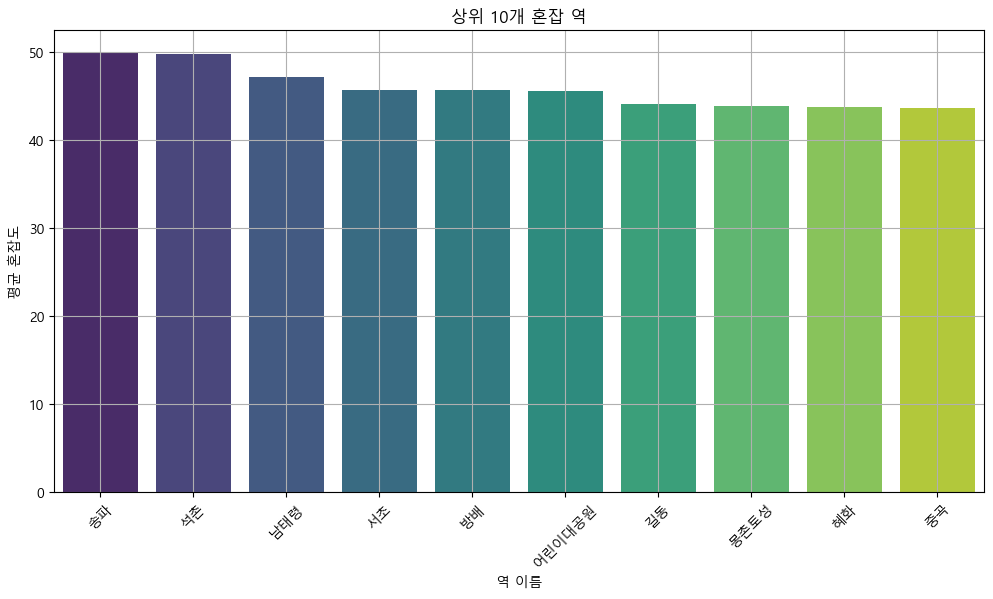

In [14]:
# 역별 혼잡도 평균 시각화(각 시간대별 혼잡도를 평균)
average_congestion_by_station = congestion_data.groupby('출발역')[time_columns].mean().mean(axis=1)
top_10_congested_stations = average_congestion_by_station.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_congested_stations.index, y=top_10_congested_stations.values, palette='viridis')
plt.title('상위 10개 혼잡 역')
plt.xlabel('역 이름')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.grid()
plt.show()


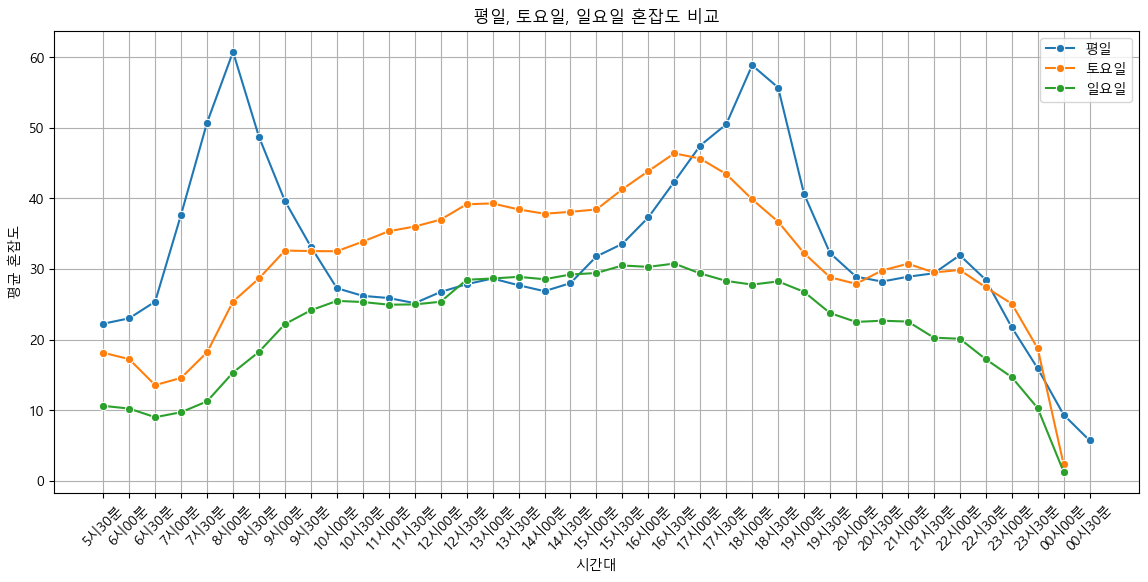

In [23]:
# 평일, 토요일, 일요일 각각에 대한 평균 혼잡도 계산
weekday_congestion = congestion_data[congestion_data['요일구분'] == '평일'][time_columns].mean()
saturday_congestion = congestion_data[congestion_data['요일구분'] == '토요일'][time_columns].mean()
sunday_congestion = congestion_data[congestion_data['요일구분'] == '일요일'][time_columns].mean()

# 세 가지 구분 비교 시각화
plt.figure(figsize=(14, 6))
sns.lineplot(x=weekday_congestion.index, y=weekday_congestion.values, label='평일', marker='o')
sns.lineplot(x=saturday_congestion.index, y=saturday_congestion.values, label='토요일', marker='o')
sns.lineplot(x=sunday_congestion.index, y=sunday_congestion.values, label='일요일', marker='o')
plt.title('평일, 토요일, 일요일 혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

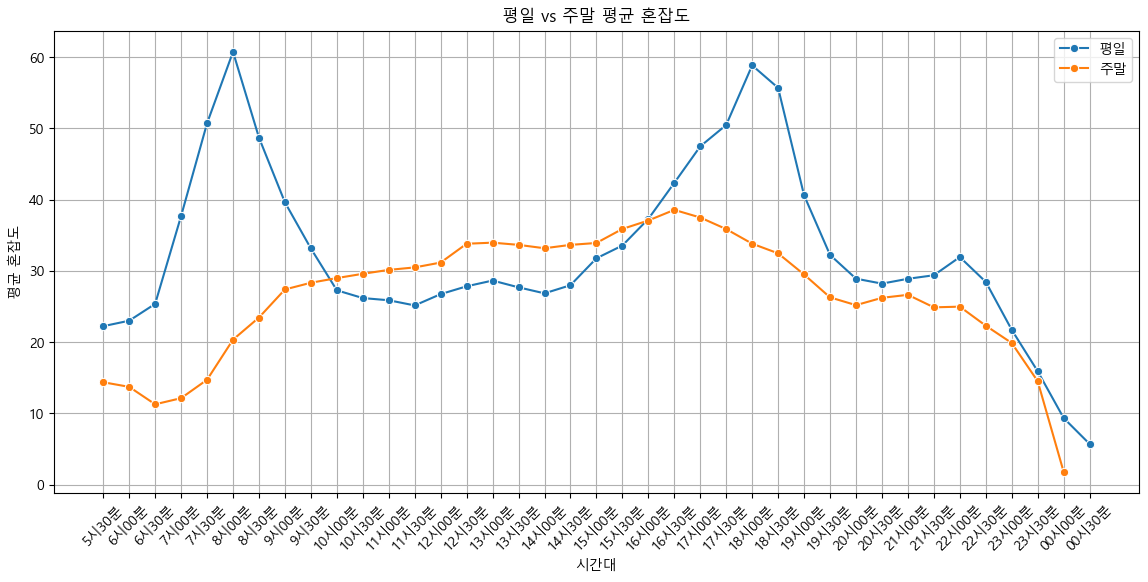

In [25]:
# 평일과 주말로 묶기
weekday_data = congestion_data[congestion_data['요일구분'] == '평일']
weekend_data = congestion_data[congestion_data['요일구분'].isin(['토요일', '일요일'])]

# 평일/주말 혼잡도 계산
weekday_congestion = weekday_data[time_columns].mean()
weekend_congestion = weekend_data[time_columns].mean()

# 평일/주말 비교 시각화
plt.figure(figsize=(14, 6))
sns.lineplot(x=weekday_congestion.index, y=weekday_congestion.values, label='평일', marker='o')
sns.lineplot(x=weekend_congestion.index, y=weekend_congestion.values, label='주말', marker='o')
plt.title('평일 vs 주말 평균 혼잡도')
plt.xlabel('시간대')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

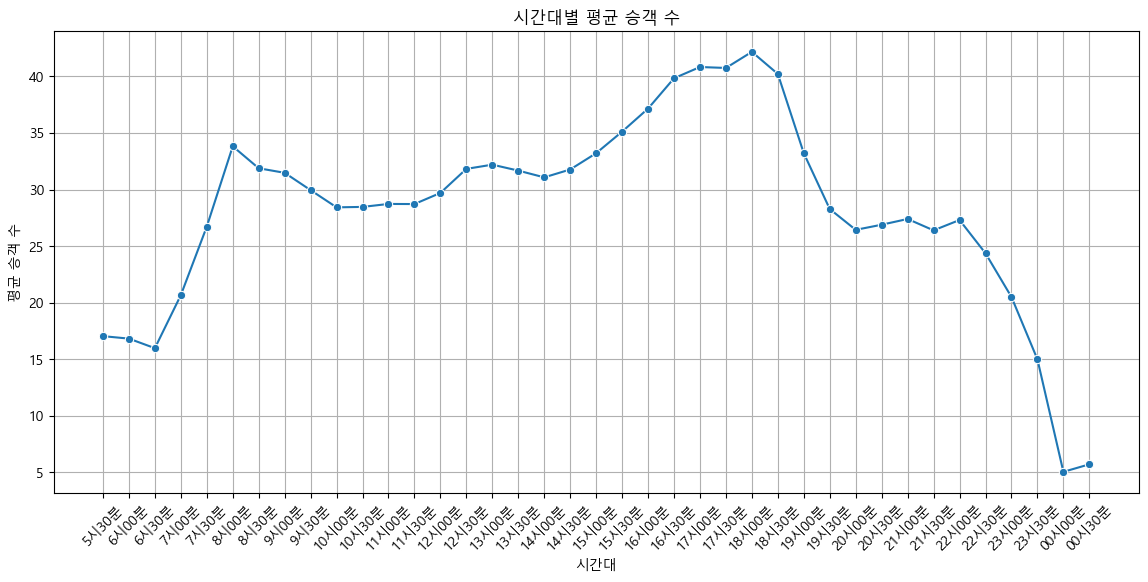

In [26]:
# 시간대별 평균 승객 수
hourly_passenger = congestion_data[time_columns].mean()

# 시각화
plt.figure(figsize=(14, 6))
sns.lineplot(x=hourly_passenger.index, y=hourly_passenger.values, marker='o')
plt.title('시간대별 평균 승객 수')
plt.xlabel('시간대')
plt.ylabel('평균 승객 수')
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10808\2442435822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations.index, y=top_10_stations.values, palette='viridis')


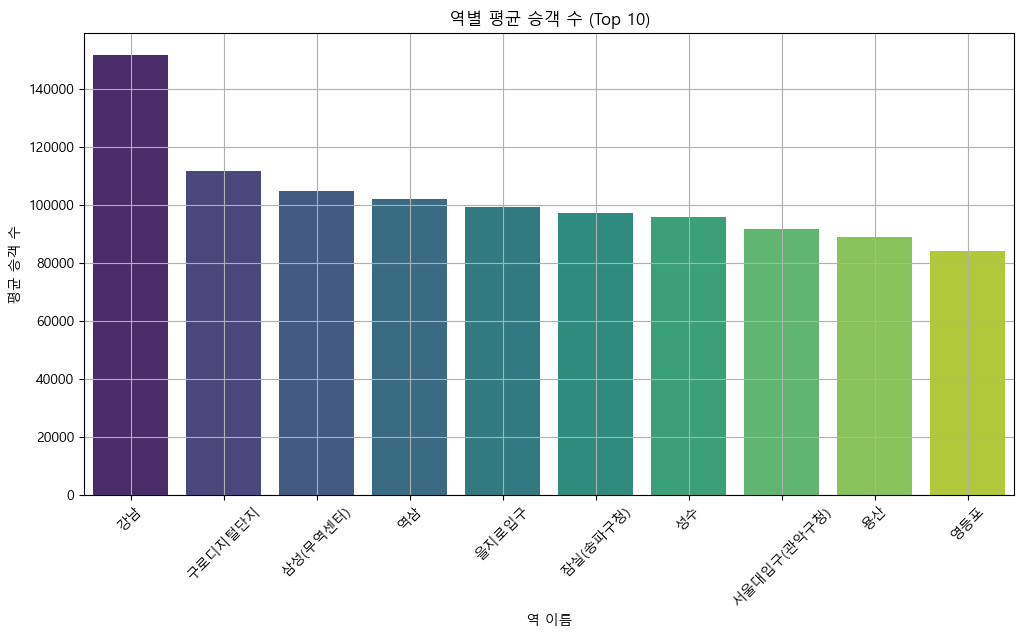

In [27]:
# 역별 평균 승객 수
station_passenger = passenger_data.groupby('역명')[['승차총승객수', '하차총승객수']].mean().sum(axis=1)
top_10_stations = station_passenger.nlargest(10)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.index, y=top_10_stations.values, palette='viridis')
plt.title('역별 평균 승객 수 (Top 10)')
plt.ylabel('평균 승객 수')
plt.xlabel('역 이름')
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10808\2426506486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_congestion.index, y=line_congestion.values, palette='viridis')


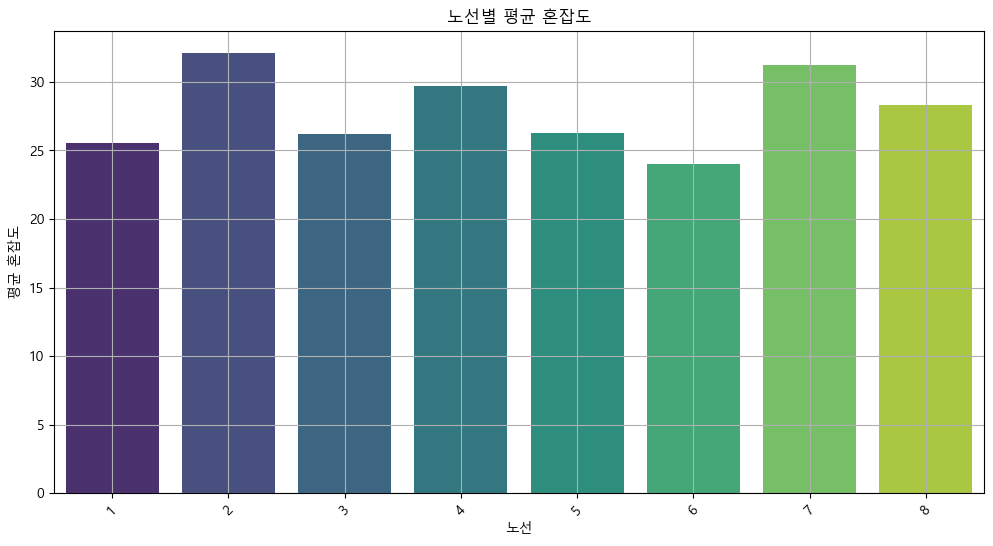

In [28]:
# 노선별 평균 혼잡도
line_congestion = congestion_data.groupby('호선')[time_columns].mean().mean(axis=1)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=line_congestion.index, y=line_congestion.values, palette='viridis')
plt.title('노선별 평균 혼잡도')
plt.xlabel('노선')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.grid()
plt.show()


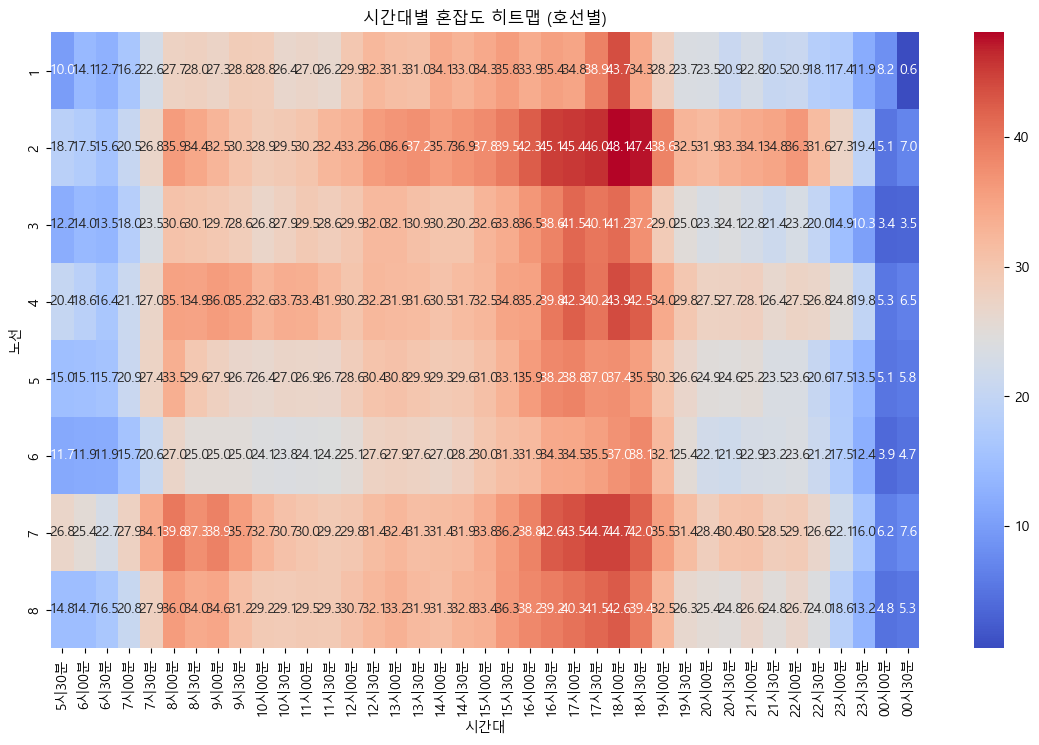

In [29]:
# 시간대별 혼잡도 히트맵
heatmap_data = congestion_data.groupby('호선')[time_columns].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('시간대별 혼잡도 히트맵 (호선별)')
plt.xlabel('시간대')
plt.ylabel('노선')
plt.show()


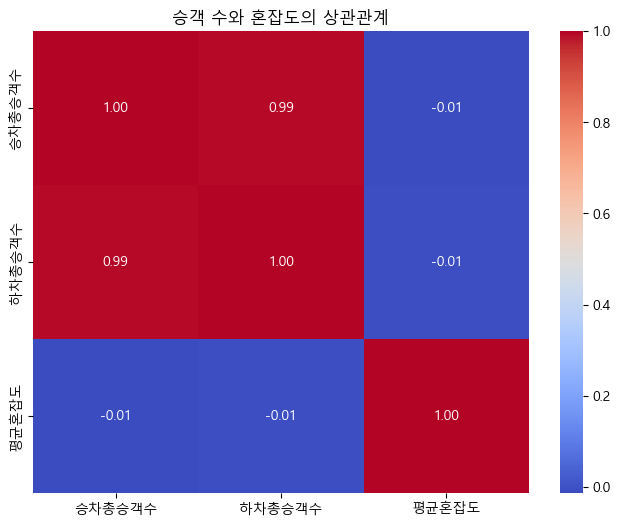

In [30]:
# 상관관계 계산
correlation_matrix = passenger_data[['승차총승객수', '하차총승객수']].join(
    congestion_data[time_columns].mean(axis=1).rename('평균혼잡도')
).corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('승객 수와 혼잡도의 상관관계')
plt.show()
